In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('laliga_player_stats_english.csv') # read csv file
df.head(5) # show first 5 rows

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,...,0,15,107,38,69,536.0,457.0,78,1,0


<AxesSubplot: title={'center': 'FC Barcelona, position'}>

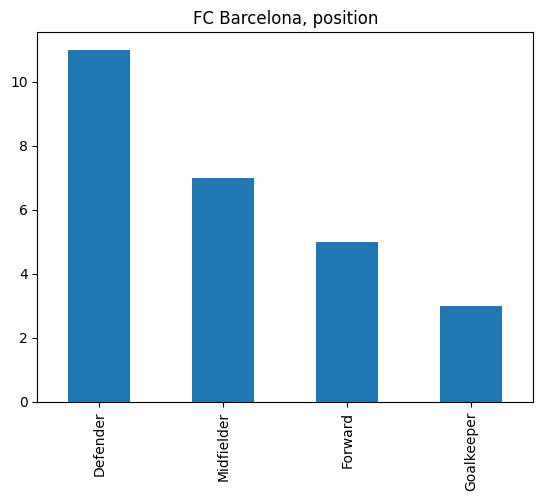

In [2]:
df[df['Team'] == 'FC Barcelona']['Position'].value_counts().plot(kind='bar', title='FC Barcelona, position') # show bar chart

In [3]:
Goals = df[df['Goals scored per attempt']>=3].reset_index() # show players with more than 3 goals per attempt
Goals_Barcelona = Goals[Goals['Team'] == 'FC Barcelona'] # show players from FC Barcelona with more than 3 goals per attempt
Goals_Barcelona_per_player = Goals_Barcelona.groupby('Name')['Goals scored per attempt'].sum().reset_index() # show players from FC Barcelona with more than 3 goals per attempt and sum of goals per player
Goals_Barcelona_per_player

,Name,Goals scored per attempt
0,Coutinho,3
1,Messi,9
2,O. Dembélé,6
3,Piqué,4
4,Suárez,6


<AxesSubplot: title={'center': 'FC Barcelona, goals scored per attempt'}, xlabel='Name'>

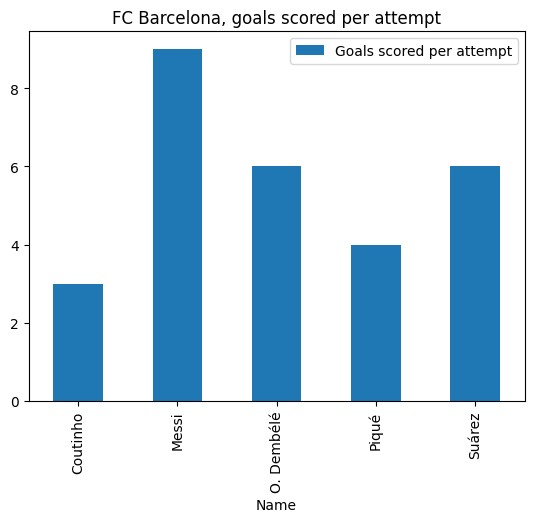

In [4]:
Goals_Barcelona_per_player.plot(kind='bar', x='Name', y='Goals scored per attempt', title='FC Barcelona, goals scored per attempt') # show bar chart

C:\Users\48577\AppData\Local\Temp\ipykernel_11352\2780969313.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Barcelonas_Position_cards = df[df['Team'] == 'FC Barcelona'].groupby('Position')['Yellow Cards', 'Red Cards'].sum().reset_index() # show sum of yellow and red cards for FC Barcelona per position


<AxesSubplot: title={'center': 'FC Barcelona, yellow and red cards'}, xlabel='Position'>

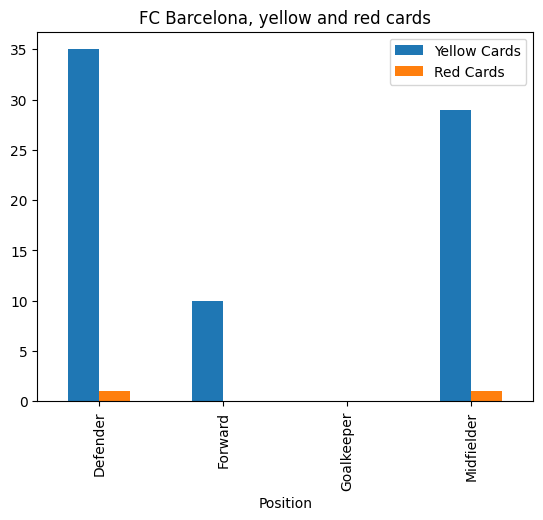

In [5]:
Barcelonas_yellows = df[df['Team'] == 'FC Barcelona']['Yellow Cards'].sum() # show sum of yellow cards for FC Barcelona
Barcelonas_Position_cards = df[df['Team'] == 'FC Barcelona'].groupby('Position')['Yellow Cards', 'Red Cards'].sum().reset_index() # show sum of yellow and red cards for FC Barcelona per position
Barcelonas_Position_cards.plot(kind='bar', x='Position', y=['Yellow Cards', 'Red Cards'], title='FC Barcelona, yellow and red cards') # show bar chart

<AxesSubplot: title={'center': 'FC Barcelona, yellow cards'}, xlabel='Name'>

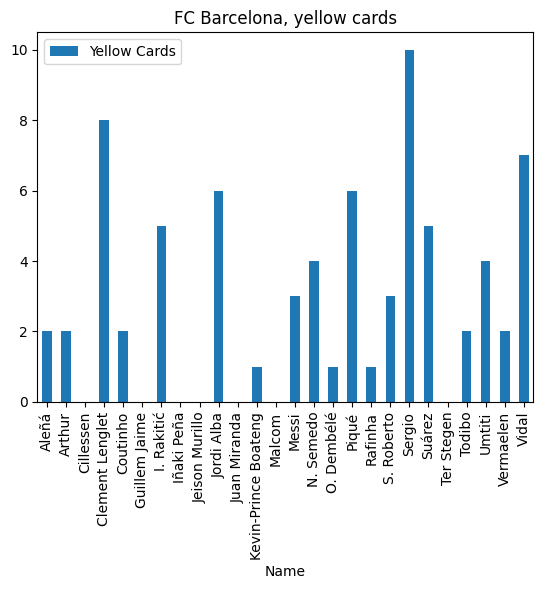

In [6]:
Player_Barcelona_yellows = df[df['Team'] == 'FC Barcelona'].groupby('Name')['Yellow Cards'].sum().reset_index() # show sum of yellow cards for FC Barcelona per player
Player_Barcelona_yellows.plot(kind='bar', x='Name', y='Yellow Cards', title='FC Barcelona, yellow cards') # show bar chart

<AxesSubplot: title={'center': 'FC Barcelona, red cards'}, xlabel='Name'>

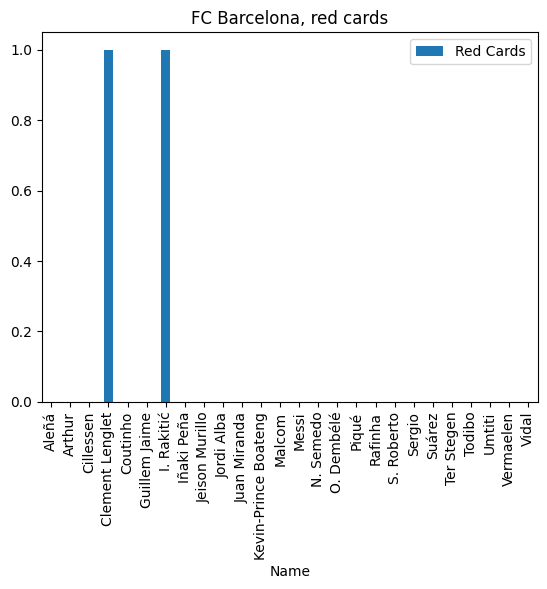

In [7]:
Barcelona_reds = df[df['Team'] == 'FC Barcelona']['Red Cards'].sum() # show sum of red cards for FC Barcelona
Player_Barcelona_reds = df[df['Team'] == 'FC Barcelona'].groupby('Name')['Red Cards'].sum().reset_index() # show sum of red cards for FC Barcelona per player
Player_Barcelona_reds.plot(kind='bar', x='Name', y='Red Cards', title='FC Barcelona, red cards') # show bar chart

In [8]:
DfLiga = pd.read_csv('season-1819_csv.csv') # read csv file
DfLiga.head(5) # show first 5 rows

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,SP1,17/08/2018,Betis,Levante,0,3,A,0,1,A,...,2.06,20,-0.75,1.89,1.85,2.07,2.00,1.59,4.42,5.89
1,SP1,17/08/2018,Girona,Valladolid,0,0,D,0,0,D,...,1.71,20,-0.75,2.06,2.01,1.90,1.85,1.76,3.57,5.62
2,SP1,18/08/2018,Barcelona,Alaves,3,0,H,0,0,D,...,3.18,19,-2.50,1.95,1.91,2.00,1.95,1.10,11.85,32.17
3,SP1,18/08/2018,Celta,Espanol,1,1,D,0,1,A,...,1.76,18,-0.75,2.26,2.18,1.74,1.71,2.18,3.26,3.85
4,SP1,18/08/2018,Villarreal,Sociedad,1,2,A,1,1,D,...,1.81,18,-0.25,1.76,1.74,2.23,2.14,2.32,3.21,3.53


In [9]:
Barcelona_Date_Home = DfLiga[DfLiga['HomeTeam'] == 'Barcelona']['Date'] # dates for FC Barcelona as home team
Barcolena_Date_Away = DfLiga[DfLiga['AwayTeam'] == 'Barcelona']['Date'] # date for FC Barcelona as away team
Barcelona_Matches_dates = pd.concat([Barcelona_Date_Home, Barcolena_Date_Away]) # all matches for FC Barcelona
Barcelona_Matches_dates = Barcelona_Matches_dates.reset_index() # reset index
Barcelona_Matches_dates = Barcelona_Matches_dates.drop(['index'], axis=1) # drop index

In [10]:
BarcelonaHome_Match_Result = DfLiga[DfLiga['HomeTeam'] == 'Barcelona']['FTR'] # results for FC Barcelona as home team
BarcelonaAway_Match_Result = DfLiga[DfLiga['AwayTeam'] == 'Barcelona']['FTR'] # results for FC Barcelona as away team
pd.options.mode.chained_assignment = None # turn off warning   

for index, row in BarcelonaHome_Match_Result.items(): # loop for results as home team
    if row == 'H': # if home team wins
        BarcelonaHome_Match_Result[index] = 'Win' # change to Win
    elif row == 'D': # if draw
        BarcelonaHome_Match_Result[index] = 'Draw' # change to Draw
    else: # if away team wins
        BarcelonaHome_Match_Result[index] = 'Loss' # change to Loss

for index, row in BarcelonaAway_Match_Result.items(): # loop for results as away team
    if row == 'H': # if home team wins
        BarcelonaAway_Match_Result[index] = 'Loss' # change to Loss
    elif row == 'D': # if draw
        BarcelonaAway_Match_Result[index] = 'Draw' # change to Draw
    else: # if away team wins
        BarcelonaAway_Match_Result[index] = 'Win' # change to Win

In [11]:
Barcelona_Match = pd.concat([BarcelonaHome_Match_Result, BarcelonaAway_Match_Result]) # all results for FC Barcelona
Barcelona_Match = Barcelona_Match.reset_index() # reset index
Barcelona_Match = Barcelona_Match.drop(['index'], axis=1) # drop index
Barcelona_Match['Date'] = Barcelona_Matches_dates # add dates to results
Barcelona_Match

,FTR,Date
0,Win,18/08/2018
1,Win,02/09/2018
2,Draw,23/09/2018
3,Draw,29/09/2018
4,Win,20/10/2018
5,Win,28/10/2018
6,Loss,11/11/2018
7,Win,02/12/2018
8,Win,22/12/2018
9,Win,13/01/2019


In [12]:
BarcelonaHome = DfLiga[DfLiga['HomeTeam'] == 'Barcelona']['FTR'].value_counts() # show results for FC Barcelona as home team
BarcelonaAway = DfLiga[DfLiga['AwayTeam'] == 'Barcelona']['FTR'].value_counts() # show results for FC Barcelona as away team

In [13]:
Wins = BarcelonaHome['H'] + BarcelonaAway['A'] # show sum of wins
Draws = BarcelonaHome['D'] + BarcelonaAway['D'] # show sum of draws
Losses = BarcelonaHome['A'] + BarcelonaAway['H'] # show sum of losses
Matches = [Wins, Draws, Losses] # show list of matches

([<matplotlib.patches.Wedge at 0x21b052c6da0>,
 [Text(-0.9208831023709365, -0.6016430102375323, 'Wins'),
  Text(1.0403989315500632, 0.3571695160977307, 'Draws'),
  Text(0.27003392550763294, 1.0663403204769752, 'Losses')],
 [Text(-0.5022998740205108, -0.3281689146750176, '68.4%'),
  Text(0.5674903263000344, 0.19481973605330763, '23.7%'),
  Text(0.1472912320950725, 0.5816401748056228, '7.9%')])

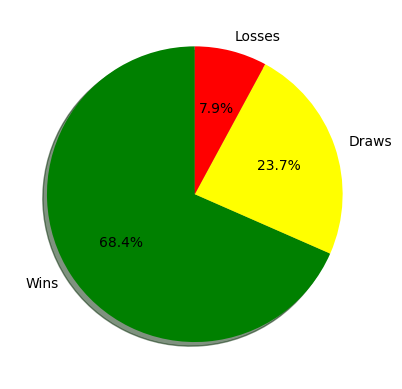

In [14]:
plt.pie(Matches, labels=['Wins', 'Draws', 'Losses'], autopct='%1.1f%%', shadow=True, startangle=90, colors=['green', 'yellow', 'red']) # show pie chart